<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-2/blob/main/Dataset_SHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SHP.csv to SHP.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df_shp = pd.read_csv('/content/SHP.csv')
df_shp.head(10)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,2,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,3,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,4,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True
5,5,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
6,6,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
7,7,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
8,8,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
9,9,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True


In [4]:
rm = ['Unnamed: 0', 'PassengerId']
df_shp.drop(rm, axis=1, inplace=True)
df_shp.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True
5,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
6,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
7,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
8,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
9,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True


In [9]:
df_shp['Age'] = df_shp['Age'].astype(str).str.strip().str.replace('[^0-9\.]', '', regex=True)
df_shp['Age'] = pd.to_numeric(df_shp['Age'], errors='coerce').fillna(0).astype(int)

df_shp['Spa'] = df_shp['Spa'].astype(str).str.strip().str.replace('[^0-9\.]', '', regex=True)
df_shp['Spa'] = pd.to_numeric(df_shp['Spa'], errors='coerce').fillna(0)


df_shp['VRDeck'] = df_shp['VRDeck'].astype(str).str.strip().str.replace('[^0-9\.]', '', regex=True)
df_shp['VRDeck'] = pd.to_numeric(df_shp['VRDeck'], errors='coerce').fillna(0)

In [10]:
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         11982 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           12138 non-null  int64  
 5   VIP           11963 non-null  object 
 6   RoomService   12002 non-null  object 
 7   FoodCourt     11991 non-null  object 
 8   ShoppingMall  11964 non-null  object 
 9   Spa           12138 non-null  float64
 10  VRDeck        12138 non-null  float64
 11  Name          11973 non-null  object 
 12  Transported   12138 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [11]:
df_shp.isna().sum()

,0
HomePlanet,153
CryoSleep,183
Cabin,156
Destination,157
Age,0
VIP,175
RoomService,136
FoodCourt,147
ShoppingMall,174
Spa,0


In [12]:
num_cols = df_shp.select_dtypes(include=np.number).columns
df_shp[num_cols] = df_shp[num_cols].fillna(df_shp[num_cols].median())

cat_cols = df_shp.select_dtypes(include='object').columns
for col in cat_cols:
    df_shp[col].fillna(df_shp[col].mode()[0], inplace=True)

print(df_shp.isna().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [13]:
df_shp.duplicated().sum()

3183

In [14]:
df_shp.drop_duplicates(inplace=True)
df_shp.duplicated().sum()

0

In [15]:
print("\nMissing Values Setelah Imputasi:\n", df_shp.isna().sum())


Missing Values Setelah Imputasi:
 HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [16]:
fix = ['RoomService', 'FoodCourt', 'ShoppingMall']

df_shp[fix] = df_shp[fix].apply(pd.to_numeric, errors='coerce')
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8955 entries, 0 to 12137
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8955 non-null   object 
 1   CryoSleep     8955 non-null   object 
 2   Cabin         8955 non-null   object 
 3   Destination   8955 non-null   object 
 4   Age           8955 non-null   int64  
 5   VIP           8955 non-null   object 
 6   RoomService   8888 non-null   float64
 7   FoodCourt     8886 non-null   float64
 8   ShoppingMall  8882 non-null   float64
 9   Spa           8955 non-null   float64
 10  VRDeck        8955 non-null   float64
 11  Name          8955 non-null   object 
 12  Transported   8955 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 918.2+ KB


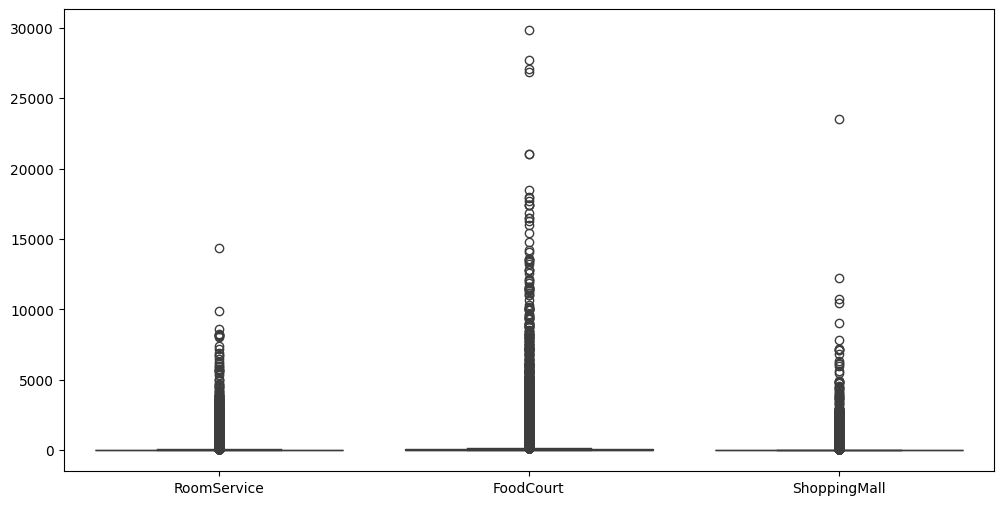

In [17]:
num = ['RoomService', 'FoodCourt', 'ShoppingMall']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_shp[num])
plt.show()

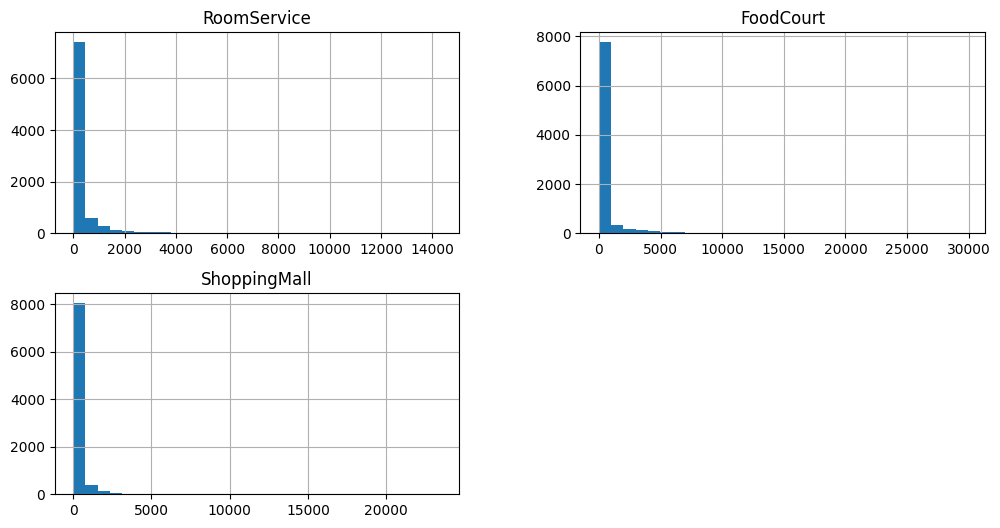

In [18]:
df_shp[num] = df_shp[num].replace([np.inf, -np.inf], np.nan)
df_shp.dropna(subset=num, inplace=True)

df_shp[num].hist(bins=30, figsize=(12, 6))
plt.show()

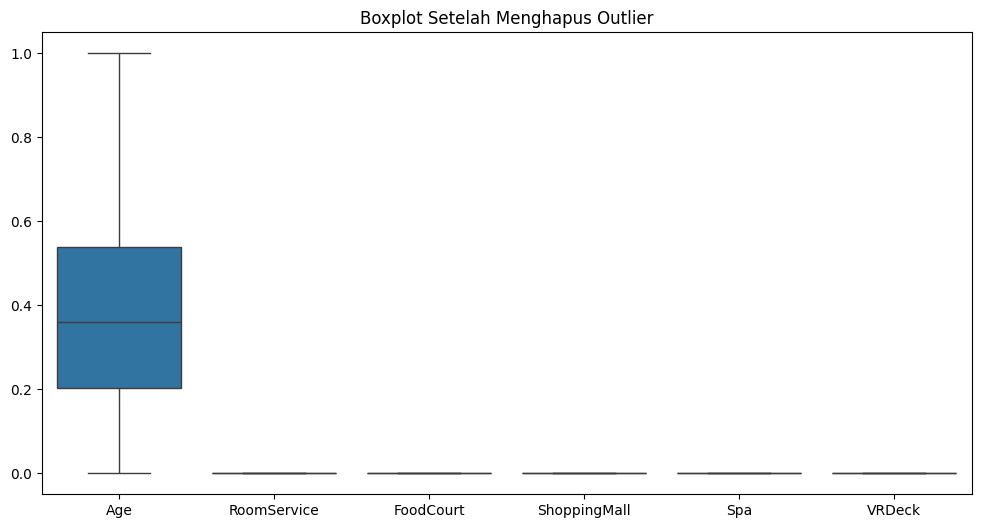

In [35]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_shp = remove_outliers(df_shp, 'RoomService')
df_shp = remove_outliers(df_shp, 'FoodCourt')
df_shp = remove_outliers(df_shp, 'ShoppingMall')

df_shp['RoomService'] = np.log(df_shp['RoomService'] + 1)
df_shp['FoodCourt'] = np.log(df_shp['FoodCourt'] + 1)
df_shp['ShoppingMall'] = np.log(df_shp['ShoppingMall'] + 1)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_shp[num_cols])
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

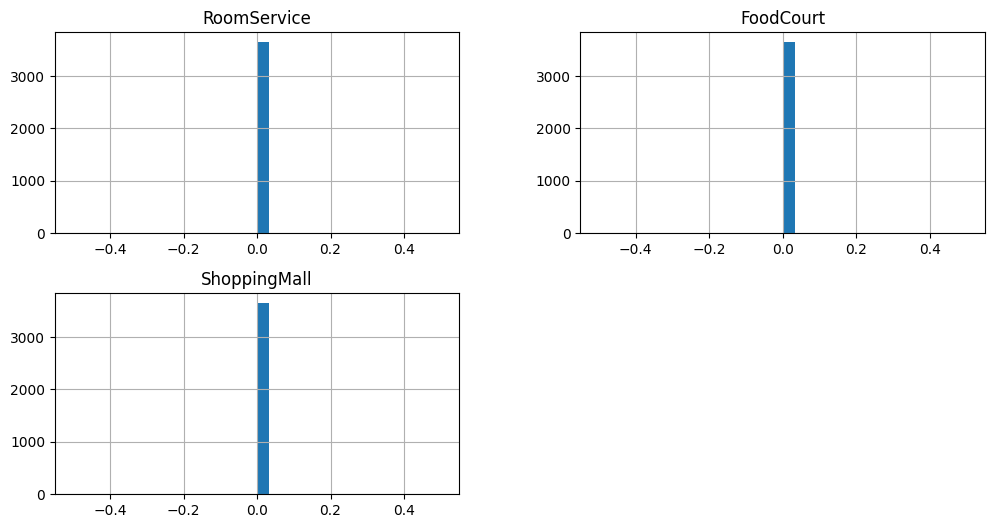

In [36]:
df_shp[num].hist(bins=30, figsize=(12,6))
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall']
df_shp[num_cols] = scaler.fit_transform(df_shp[num_cols])

In [38]:
categorical_cols = df_shp.select_dtypes(include=['object']).columns
df_shp = pd.get_dummies(df_shp, columns=categorical_cols, drop_first=True)

In [39]:
x = df_shp.drop('Transported', axis=1)
y = df_shp['Transported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2920, 8738), (731, 8738), (2920,), (731,))

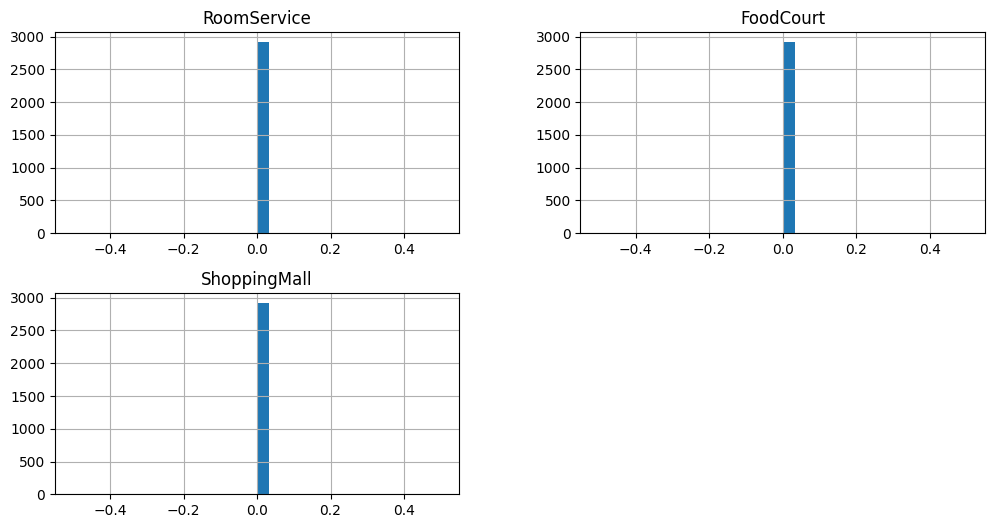

In [40]:
x_train[num].hist(bins=30, figsize=(12,6))
plt.show()

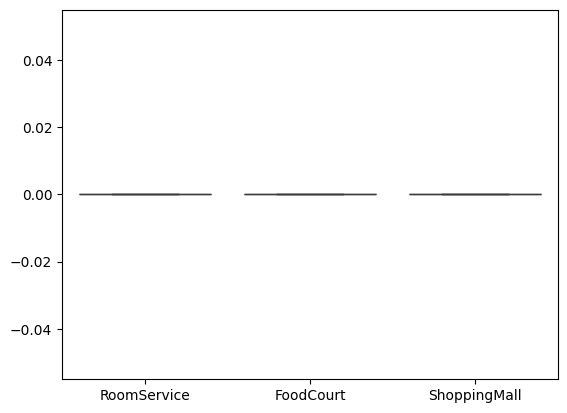

In [41]:
sns.boxplot(data=x_train[num])
plt.show()

In [42]:
x_train['RoomService'].skew(), x_train['FoodCourt'].skew(), x_train['ShoppingMall'].skew()

(0.0, 0.0, 0.0)

In [43]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [44]:
print("\nShape Data:")
print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Shape Data:
x_train: (2920, 8738) x_test: (731, 8738)
y_train: (2920,) y_test: (731,)


In [45]:
print("Train missing data", x_train.isna().sum().sum(), "\nTest missing data", x_test.isna().sum().sum())
print()
print("Train duplicated data", x_test.duplicated().sum(), "\nTest duplicated data", x_test.duplicated().sum())

Train missing data 0 
Test missing data 0

Train duplicated data 0 
Test duplicated data 0



Missing Values Setelah One-Hot Encoding:
 0

Distribusi Label (y_train):
Transported
True     2307
False     613
Name: count, dtype: int64

Distribusi Label (y_test):
Transported
True     594
False    137
Name: count, dtype: int64


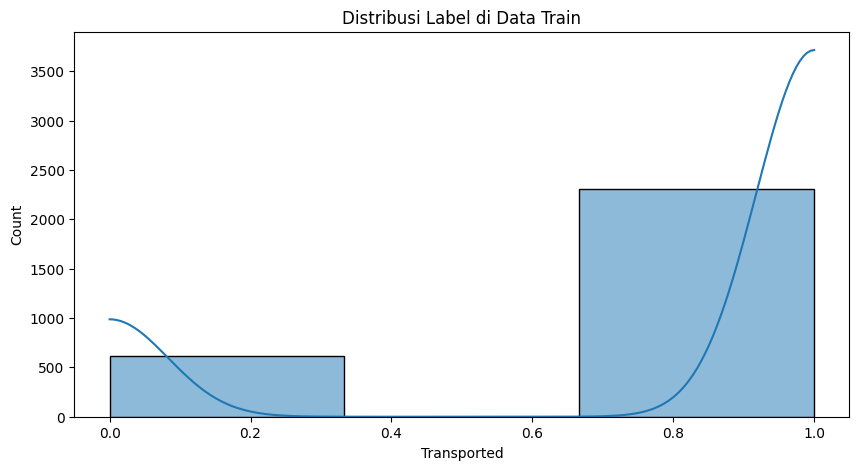

In [46]:
print("\nMissing Values Setelah One-Hot Encoding:\n", df_shp.isna().sum().sum())

num_cols = df_shp.select_dtypes(include=np.number).columns
df_shp[num_cols] = scaler.fit_transform(df_shp[num_cols])

x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

print("\nDistribusi Label (y_train):")
print(pd.Series(y_train).value_counts())

print("\nDistribusi Label (y_test):")
print(pd.Series(y_test).value_counts())

plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=3, kde=True)
plt.title("Distribusi Label di Data Train")
plt.show()